### Start your data from the first day of infections in US. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from  statsmodels.tools.eval_measures import rmse

In [2]:
case_raw=pd.read_csv('../Data/Input/covid_confirmed_usafacts.csv', na_values=['X'])
death_raw=pd.read_csv('../Data/Input/covid_deaths_usafacts.csv', na_values=['X'])
popu_raw=pd.read_csv('../Data/Input/covid_county_population_usafacts.csv', na_values=['X'])
USA_case_raw=case_raw.sum()
USA_death_raw=death_raw.sum()

In [3]:
USA_popu=popu_raw.sum()[3]

In [4]:
USA_popu

328239523

In [5]:
USA_case=USA_case_raw[4:]

In [6]:
USA_death=USA_death_raw[4:]

In [7]:
USA_DATA=pd.DataFrame({'case':USA_case,'death':USA_death})

In [8]:
USA_DATA=(USA_DATA/USA_popu*400000000).round()  ##NORMALIZE BY POPULATION


In [9]:
USA_DATA

,case,death
1/22/20,1.21862,0
1/23/20,1.21862,0
1/24/20,2.43724,0
1/25/20,2.43724,0
1/26/20,6.09311,0
...,...,...
11/10/20,1.23571e+07,289273
11/11/20,1.25369e+07,291114
11/12/20,1.27138e+07,292065
11/13/20,1.29356e+07,293962


In [10]:
week=1
week_case=[]
week_death=[]
for x in range(6,len(USA_DATA),7):     
    week_case.append(USA_DATA.iloc[x][0])
    week_death.append(USA_DATA.iloc[x][1])
    week=week+1

In [11]:
week_data=pd.DataFrame({'week':range(1,len(week_case)+1),'case':week_case,'death':week_death})
week_data

,week,case,death
0,1,7.311734e+00,0.000000
1,2,1.340485e+01,0.000000
2,3,1.462347e+01,1.218622
3,4,1.706071e+01,2.437245
4,5,2.193520e+01,2.437245
5,6,9.870841e+01,10.967601
6,7,1.262493e+03,41.433158
7,8,7.679758e+03,145.016053
8,9,6.566912e+04,973.679212
9,10,2.275777e+05,5287.602127


In [12]:
first_newcase=week_data.iloc[0][1]
week_data.case=week_data.case.diff()
week_data=week_data.fillna(first_newcase)  
week_data.death=week_data.death.diff()
week_data=week_data.fillna(0)
week_data

,week,case,death
0,1,7.311734e+00,0.000000
1,2,6.093111e+00,0.000000
2,3,1.218622e+00,1.218622
3,4,2.437245e+00,1.218622
4,5,4.874489e+00,0.000000
5,6,7.677320e+01,8.530356
6,7,1.163784e+03,30.465557
7,8,6.417265e+03,103.582895
8,9,5.798936e+04,828.663159
9,10,1.619086e+05,4313.922915


### Aim to predict 1 week in advance. Use older data to validate your models. Use Root Mean Square Error (RMSE) to see the evaluation.

the parameters for the linear model coefficents for USA
Intercept   -38696.406855
week         15484.330993
dtype: float64
the parameters for the polynomial model(n=2) coefficents for USA
Intercept        -31031.947052
week              14439.177383
I(week ** 2.0)       24.305898
dtype: float64
the parameters for the polynomial model(n=6) coefficents for USA
Intercept          92111.712428
week             -100726.390947
I(week ** 2.0)     27123.857393
I(week ** 3.0)     -2679.956151
I(week ** 4.0)       128.275889
I(week ** 5.0)        -2.919955
I(week ** 6.0)         0.025206
dtype: float64




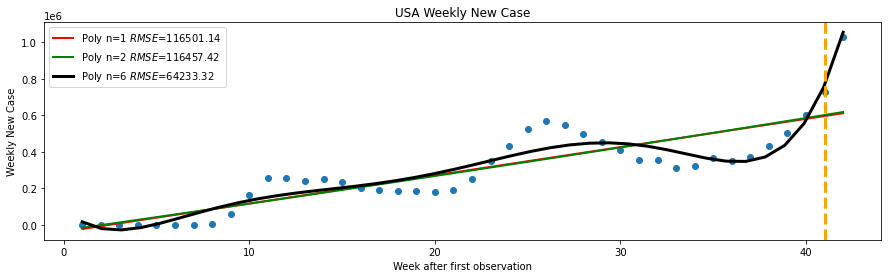

In [13]:
plt.figure(figsize=(15, 4))
plt.scatter(week_data.week,week_data.case)
#create a fitted model in linear and nonlinear
case_poly1=smf.ols(formula='case ~ week',data=week_data).fit()
case_poly2 = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)', data=week_data).fit()
case_poly6  = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)+I(week ** 3.0)+I(week ** 4.0)+I(week ** 5.0)+I(week ** 6.0)', data=week_data).fit()

x=pd.DataFrame({'week':np.linspace(week_data.week.min(),week_data.week.max(),40)})
plt.plot(x.week,case_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(week_data.case,case_poly1.predict(week_data.week)))
plt.plot(x.week,case_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(week_data.case,case_poly2.predict(week_data.week)))
plt.plot(x.week,case_poly6.predict(x),color='black',linewidth=3,label='Poly n=6 $RMSE$=%.2f'%rmse(week_data.case,case_poly6.predict(week_data.week)))

plt.axvline(week_data.week.max()-1,linewidth=3,color='orange',linestyle='dashed')
plt.title('USA Weekly New Case')
plt.xlabel('Week after first observation')
plt.ylabel('Weekly New Case')
plt.legend()
print('the parameters for the linear model coefficents for USA')    
print (case_poly1.params)
print('the parameters for the polynomial model(n=2) coefficents for USA')    
print (case_poly2.params)
print('the parameters for the polynomial model(n=6) coefficents for USA')    
print (case_poly6.params)
print("\n")

In [14]:
y_test=week_data.case[-1:]
y_week=week_data.week[-1:]
y_pred_1=case_poly1.predict(y_week)
y_pred_2=case_poly2.predict(y_week)
y_pred_6=case_poly6.predict(y_week)

In [15]:
mean_squared_error(y_test,y_pred_1,squared=False)

417153.22176283645

In [16]:
mean_squared_error(y_test,y_pred_2,squared=False)

410509.60967220296

In [17]:
mean_squared_error(y_test,y_pred_6,squared=False)

26835.268234586343

the parameters for the linear model coefficents for USA
Intercept    4715.247365
week          101.032685
dtype: float64
the parameters for the polynomial model(n=2) coefficents for USA
Intercept    4715.247365
week          101.032685
dtype: float64
the parameters for the polynomial model(n=6) coefficents for USA
Intercept    4715.247365
week          101.032685
dtype: float64




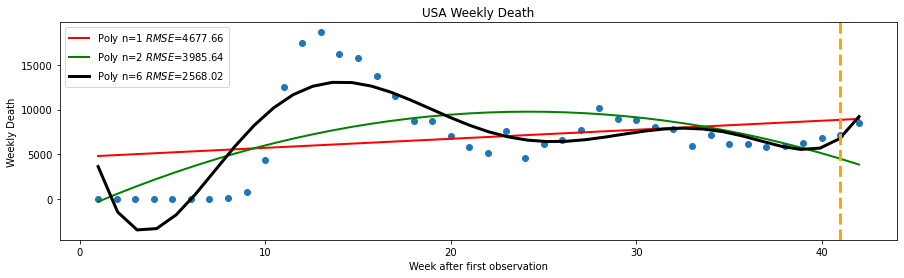

In [18]:
plt.figure(figsize=(15, 4))
plt.scatter(week_data.week,week_data.death)
#create a fitted model in linear and nonlinear
death_poly1=smf.ols(formula='death ~ week',data=week_data).fit()
death_poly2 = smf.ols(formula='death ~ 1 + week + I(week ** 2.0)', data=week_data).fit()
death_poly6  = smf.ols(formula='death ~ 1 + week + I(week ** 2.0)+I(week ** 3.0)+I(week ** 4.0)+I(week ** 5.0)+I(week ** 6.0)', data=week_data).fit()

x=pd.DataFrame({'week':np.linspace(week_data.week.min(),week_data.week.max(),40)})
plt.plot(x.week,death_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(week_data.death,death_poly1.predict(week_data.week)))
plt.plot(x.week,death_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(week_data.death,death_poly2.predict(week_data.week)))
plt.plot(x.week,death_poly6.predict(x),color='black',linewidth=3,label='Poly n=6 $RMSE$=%.2f'%rmse(week_data.death,death_poly6.predict(week_data.week)))

plt.axvline(week_data.week.max()-1,linewidth=3,color='orange',linestyle='dashed')
plt.title('USA Weekly Death')
plt.xlabel('Week after first observation')
plt.ylabel('Weekly Death')
plt.legend()
print('the parameters for the linear model coefficents for USA')    
print (death_poly1.params)
print('the parameters for the polynomial model(n=2) coefficents for USA')    
print (death_poly1.params)
print('the parameters for the polynomial model(n=6) coefficents for USA')    
print (death_poly1.params)

print("\n")

In [19]:
y_test=week_data.death[-1:]
y_week=week_data.week[-1:]
y_pred_1=death_poly1.predict(y_week)
y_pred_2=death_poly2.predict(y_week)
y_pred_6=death_poly6.predict(y_week)

In [20]:
mean_squared_error(y_test,y_pred_1,squared=False)

463.6041359436258

In [21]:
mean_squared_error(y_test,y_pred_2,squared=False)

4633.785687487332

In [22]:
mean_squared_error(y_test,y_pred_6,squared=False)

723.2381415220443

### Describe the trends as compared to other countries.

In [23]:
# Read Files
Other_countries_cases = pd.read_csv("../Data/Input/Other_total_cases.csv")
Other_countries_deaths = pd.read_csv("../Data/Input/Other_total_deaths.csv")
Other_countries_popu = pd.read_csv("../Data/Input/locations.csv")

In [24]:
Other_countries_popu

,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0
...,...,...,...,...,...
207,Wallis_and_Futuna,Wallis and Futuna,Oceania,2020.0,11246.0
208,Western_Sahara,Western Sahara,Africa,2020.0,597330.0
209,Yemen,Yemen,Asia,2020.0,29825968.0
210,Zambia,Zambia,Africa,2020.0,18383956.0


In [25]:
# select 5 counties to compare
sel=['Brazil','Indonesia','Pakistan','Nigeria','Bangladesh']
counties_case=Other_countries_cases[sel].fillna(0)
counties_death=Other_countries_deaths[sel].fillna(0)
counties_popu = Other_countries_popu.set_index('location').loc[['Brazil','Indonesia','Pakistan','Nigeria','Bangladesh']]


In [26]:
counties_death

,Brazil,Indonesia,Pakistan,Nigeria,Bangladesh
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
233,129522.0,8456.0,6370.0,1075.0,4634.0
234,130396.0,8544.0,6373.0,1076.0,4668.0
235,131210.0,8650.0,6379.0,1078.0,4702.0
236,131625.0,8723.0,6383.0,1082.0,4733.0


In [27]:
counties_case.head()

,Brazil,Indonesia,Pakistan,Nigeria,Bangladesh
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [28]:
counties_death.head()

,Brazil,Indonesia,Pakistan,Nigeria,Bangladesh
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [29]:
Brazil_DATA=pd.DataFrame({'case':counties_case.Brazil,'death':counties_death.Brazil})
Indonesia_DATA=pd.DataFrame({'case':counties_case.Indonesia,'death':counties_death.Indonesia})
Pakistan_DATA=pd.DataFrame({'case':counties_case.Pakistan,'death':counties_death.Pakistan})
Nigeria_DATA=pd.DataFrame({'case':counties_case.Nigeria,'death':counties_death.Nigeria})
Bangladesh_DATA=pd.DataFrame({'case':counties_case.Bangladesh,'death':counties_death.Bangladesh})

In [30]:
Brazil_DATA=Brazil_DATA[Brazil_DATA.case>0]
Indonesia_DATA=Indonesia_DATA[Indonesia_DATA.case>0]
Pakistan_DATA=Pakistan_DATA[Pakistan_DATA.case>0]
Nigeria_DATA=Nigeria_DATA[Nigeria_DATA.case>0]
Bangladesh_DATA=Bangladesh_DATA[Bangladesh_DATA.case>0]

In [31]:
# normalize data by population
Brazil_DATA = ((Brazil_DATA/counties_popu.loc['Brazil']['population'])*400000000).round()
Indonesia_DATA= ((Indonesia_DATA/counties_popu.loc['Indonesia']['population'])*400000000).round()
Pakistan_DATA = ((Pakistan_DATA/counties_popu.loc['Pakistan']['population'])*400000000).round()
Nigeria_DATA= ((Nigeria_DATA/counties_popu.loc['Nigeria']['population'])*400000000).round()
Bangladesh_DATA = ((Bangladesh_DATA/counties_popu.loc['Bangladesh']['population'])*400000000).round()


In [32]:
def dataprocess(areadata):
    week=1
    week_case=[]
    week_death=[]
    for x in range(6,len(areadata),7):  
        week_case.append(areadata.iloc[x][0])
        week_death.append(areadata.iloc[x][1])
        week=week+1
    week_data=pd.DataFrame({'week':range(1,len(week_case)+1),'case':week_case,'death':week_death})
    first_newcase=week_data.iloc[0][1]
    week_data.case=week_data.case.diff()
    week_data=week_data.fillna(first_newcase)  
    week_data.death=week_data.death.diff()
    week_data=week_data.fillna(0)
    return week_data

def casedataplot(week_data,county):
    plt.figure(figsize=(15, 4))
    plt.scatter(week_data.week,week_data.case)
    #create a fitted model in linear and nonlinear
    case_poly1=smf.ols(formula='case ~ week',data=week_data).fit()
    case_poly2 = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)', data=week_data).fit()
    case_poly6  = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)+I(week ** 3.0)+I(week ** 4.0)+I(week ** 5.0)+I(week ** 6.0)', data=week_data).fit()
    x=pd.DataFrame({'week':np.linspace(week_data.week.min(),week_data.week.max(),40)})
    plt.plot(x.week,case_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(week_data.case,case_poly1.predict(week_data.week)))
    plt.plot(x.week,case_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(week_data.case,case_poly2.predict(week_data.week)))
    plt.plot(x.week,case_poly6.predict(x),color='black',linewidth=3,label='Poly n=6 $RMSE$=%.2f'%rmse(week_data.case,case_poly6.predict(week_data.week)))
    plt.axvline(week_data.week.max()-1,linewidth=3,color='orange',linestyle='dashed')
    plt.title(county+' Weekly New Case')
    plt.xlabel('Week after first observation')
    plt.ylabel('Weekly New Case')
    plt.legend()
    print('the prameters for the linear model coefficents for'+county)    
    print (case_poly1.params)
    print('the parameters for the polynomial model(n=2) coefficents for'+county)  
    print (case_poly2.params)
    print('the parameters for the polynomial model(n=6) coefficents for'+county)  
    print (case_poly6.params)
    print("\n")

    
def deathdataplot(week_data,county):
    plt.figure(figsize=(15, 4))
    plt.scatter(week_data.week,week_data.death)
    #create a fitted model in linear and nonlinear
    death_poly1=smf.ols(formula='death ~ week',data=week_data).fit()
    death_poly2 = smf.ols(formula='death ~ 1 + week + I(week ** 2.0)', data=week_data).fit()
    death_poly6  = smf.ols(formula='death ~ 1 + week + I(week ** 2.0)+I(week ** 3.0)+I(week ** 4.0)+I(week ** 5.0)+I(week ** 6.0)', data=week_data).fit()

    x=pd.DataFrame({'week':np.linspace(week_data.week.min(),week_data.week.max(),40)})
    plt.plot(x.week,death_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(week_data.death,death_poly1.predict(week_data.week)))
    plt.plot(x.week,death_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(week_data.death,death_poly2.predict(week_data.week)))
    plt.plot(x.week,death_poly6.predict(x),color='black',linewidth=3,label='Poly n=6 $RMSE$=%.2f'%rmse(week_data.death,death_poly6.predict(week_data.week)))
    plt.axvline(week_data.week.max()-1,linewidth=3,color='orange',linestyle='dashed')
    plt.title(county+' Weekly Death')
    plt.xlabel('Week after first observation')
    plt.ylabel('Weekly Death')
    plt.legend()
    print('the parameters for the linear model coefficents for'+county) 
    print (death_poly1.params)
    print('the parameters for the polynomial model(n=2) coefficents for'+county)   
    print (death_poly1.params)
    print('the parameters for the polynomial model(n=6) coefficents for'+county)      
    print (death_poly1.params)
    print("\n")


In [33]:
Brazil_weekdata=dataprocess(Brazil_DATA)
Indonesia_weekdata=dataprocess(Indonesia_DATA)
Pakistan_weekdata=dataprocess(Pakistan_DATA)
Nigeria_weekdata=dataprocess(Nigeria_DATA)
Bangladesh_weekdata=dataprocess(Bangladesh_DATA)

the prameters for the linear model coefficents forBrazil
Intercept   -83321.596059
week         24354.051232
dtype: float64
the parameters for the polynomial model(n=2) coefficents forBrazil
Intercept        -165361.289546
week               40232.701584
I(week ** 2.0)      -529.288345
dtype: float64
the parameters for the polynomial model(n=6) coefficents forBrazil
Intercept        -52858.274786
week              64023.481234
I(week ** 2.0)   -22118.963105
I(week ** 3.0)     3079.630288
I(week ** 4.0)     -180.557085
I(week ** 5.0)        4.909173
I(week ** 6.0)       -0.051994
dtype: float64




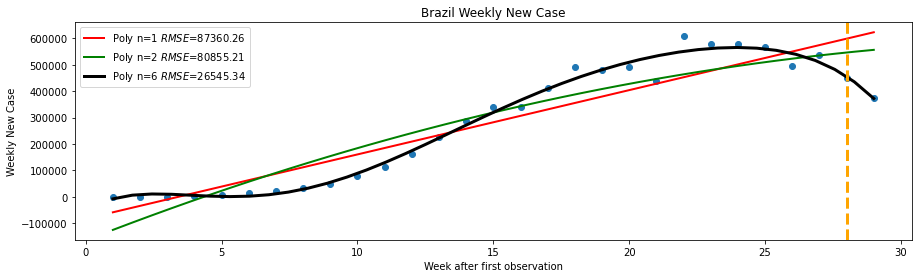

In [34]:
casedataplot(Brazil_weekdata,'Brazil')

the prameters for the linear model coefficents forIndonesia
Intercept   -4791.404558
week         1173.089744
dtype: float64
the parameters for the polynomial model(n=2) coefficents forIndonesia
Intercept         844.789744
week                6.980578
I(week ** 2.0)     41.646756
dtype: float64
the parameters for the polynomial model(n=6) coefficents forIndonesia
Intercept        -319.068847
week               54.118135
I(week ** 2.0)    305.369153
I(week ** 3.0)    -67.394593
I(week ** 4.0)      6.337064
I(week ** 5.0)     -0.255317
I(week ** 6.0)      0.003704
dtype: float64




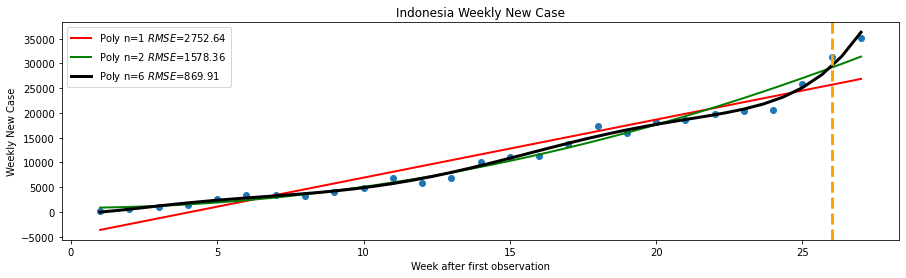

In [35]:
casedataplot(Indonesia_weekdata,'Indonesia')

the prameters for the linear model coefficents forPakistan
Intercept    13460.714286
week           418.741379
dtype: float64
the parameters for the polynomial model(n=2) coefficents forPakistan
Intercept        -23754.671856
week               7861.818608
I(week ** 2.0)     -256.657835
dtype: float64
the parameters for the polynomial model(n=6) coefficents forPakistan
Intercept        -32346.171111
week              38431.424415
I(week ** 2.0)   -13038.965358
I(week ** 3.0)     1838.940701
I(week ** 4.0)     -117.187014
I(week ** 5.0)        3.415148
I(week ** 6.0)       -0.037207
dtype: float64




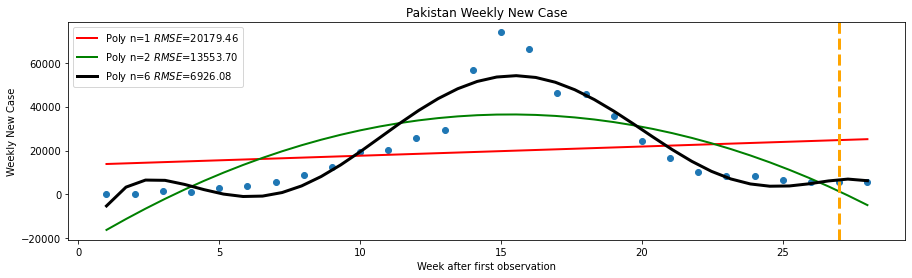

In [36]:
casedataplot(Pakistan_weekdata,'Pakistan')

the prameters for the linear model coefficents forNigeria
Intercept    968.213675
week         219.627595
dtype: float64
the parameters for the polynomial model(n=2) coefficents forNigeria
Intercept        -3648.145299
week              1174.736348
I(week ** 2.0)     -34.111027
dtype: float64
the parameters for the polynomial model(n=6) coefficents forNigeria
Intercept        -319.489784
week              388.896232
I(week ** 2.0)   -145.633990
I(week ** 3.0)     26.776911
I(week ** 4.0)     -1.544003
I(week ** 5.0)      0.031717
I(week ** 6.0)     -0.000163
dtype: float64




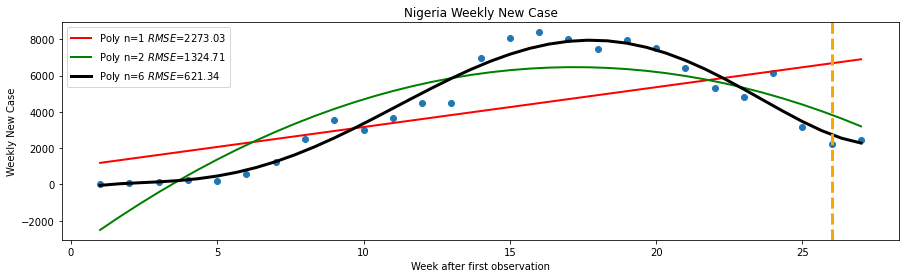

In [37]:
casedataplot(Nigeria_weekdata,'Nigeria')

the prameters for the linear model coefficents forBangladesh
Intercept    3216.461538
week         2078.196581
dtype: float64
the parameters for the polynomial model(n=2) coefficents forBangladesh
Intercept        -23907.907692
week               7890.561416
I(week ** 2.0)     -215.272772
dtype: float64
the parameters for the polynomial model(n=6) coefficents forBangladesh
Intercept        -19614.027515
week              24796.049395
I(week ** 2.0)    -9258.660899
I(week ** 3.0)     1457.647363
I(week ** 4.0)     -101.820024
I(week ** 5.0)        3.246730
I(week ** 6.0)       -0.038847
dtype: float64




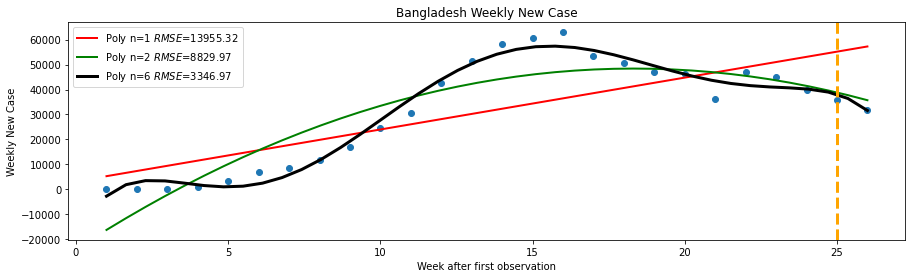

In [38]:
casedataplot(Bangladesh_weekdata,'Bangladesh')

the parameters for the linear model coefficents forBrazil
Intercept    438.288177
week         541.842857
dtype: float64
the parameters for the polynomial model(n=2) coefficents forBrazil
Intercept    438.288177
week         541.842857
dtype: float64
the parameters for the polynomial model(n=6) coefficents forBrazil
Intercept    438.288177
week         541.842857
dtype: float64




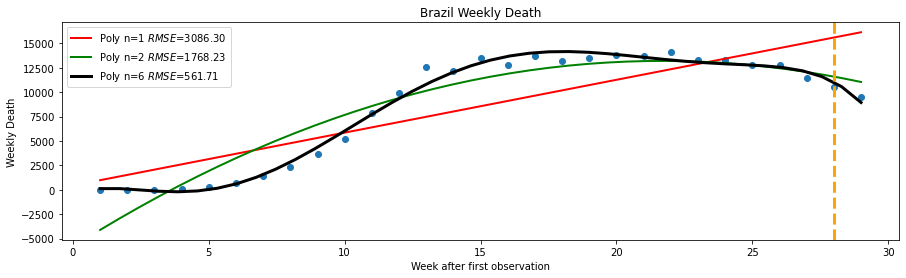

In [39]:
deathdataplot(Brazil_weekdata,'Brazil')

the parameters for the linear model coefficents forIndonesia
Intercept   -52.60114
week         37.20696
dtype: float64
the parameters for the polynomial model(n=2) coefficents forIndonesia
Intercept   -52.60114
week         37.20696
dtype: float64
the parameters for the polynomial model(n=6) coefficents forIndonesia
Intercept   -52.60114
week         37.20696
dtype: float64




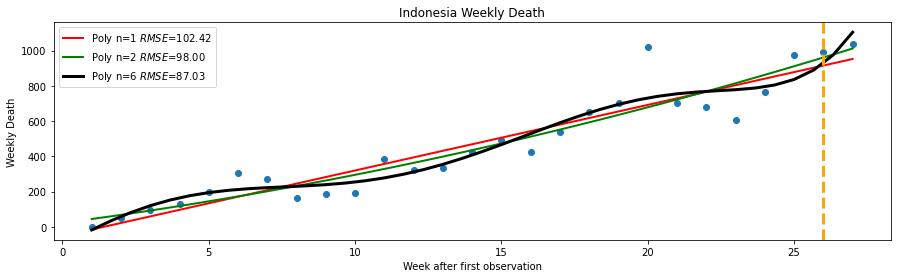

In [40]:
deathdataplot(Indonesia_weekdata,'Indonesia')

the parameters for the linear model coefficents forPakistan
Intercept    273.984127
week           9.574986
dtype: float64
the parameters for the polynomial model(n=2) coefficents forPakistan
Intercept    273.984127
week           9.574986
dtype: float64
the parameters for the polynomial model(n=6) coefficents forPakistan
Intercept    273.984127
week           9.574986
dtype: float64




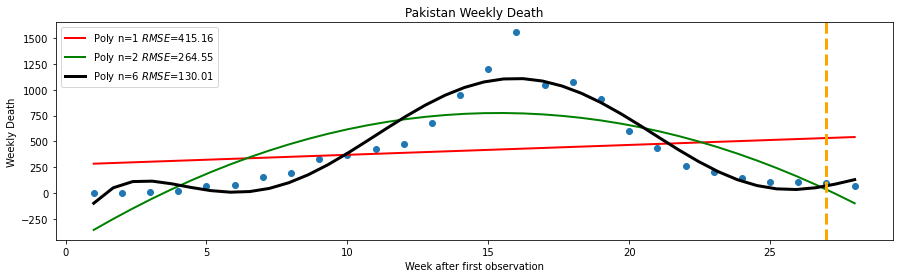

In [41]:
deathdataplot(Pakistan_weekdata,'Pakistan')

the parameters for the linear model coefficents forNigeria
Intercept    39.675214
week          2.721612
dtype: float64
the parameters for the polynomial model(n=2) coefficents forNigeria
Intercept    39.675214
week          2.721612
dtype: float64
the parameters for the polynomial model(n=6) coefficents forNigeria
Intercept    39.675214
week          2.721612
dtype: float64




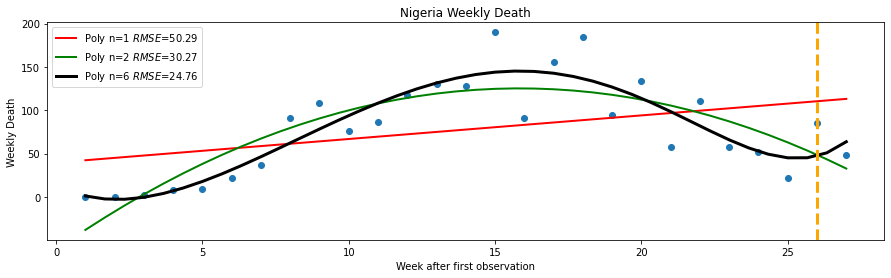

In [42]:
deathdataplot(Nigeria_weekdata,'Nigeria')

the parameters for the linear model coefficents forBangladesh
Intercept     2.120000
week         32.144957
dtype: float64
the parameters for the polynomial model(n=2) coefficents forBangladesh
Intercept     2.120000
week         32.144957
dtype: float64
the parameters for the polynomial model(n=6) coefficents forBangladesh
Intercept     2.120000
week         32.144957
dtype: float64




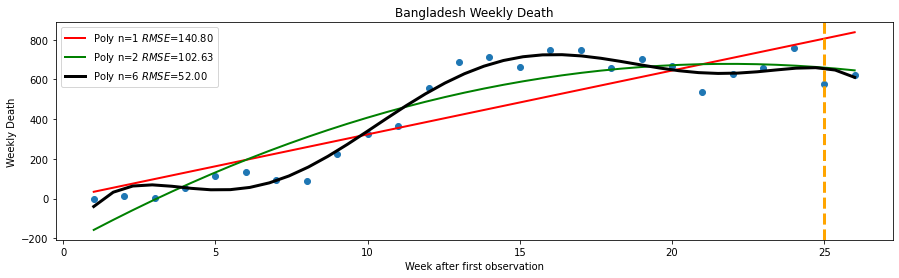

In [43]:
deathdataplot(Bangladesh_weekdata,'Bangladesh')

### In summary, from the USA CASE Plot, we can see the is going up continually, and it may wave up and down near the line of Linear regress, and surge up around 37 weeks after the first case observed. And we compare it with other 5 counties, Brazil and Bangladesh and Nigeria are similar, Nigeria has a peak around 15-20 weeks. Brazil has a peak around 20-25 weeks and the trends went down. Bangladesh has a peak in 15 weeks and went down. But if we look at the detail we will find the slope of the USA data is 15484 and only the Brazil data is 24354 which means that the virus in Brazil is spread faster than in the USA, but for the other 3 counties, their trend slope is less than 2000 in terms of linear regression. Here we have already normalized the data by population, which means that those counties other than the USA and Brizal did a really good job on antivirus. 
### In teams of death,  the death trend in the USA is really low during the initial 10 weeks and surge up to 15000 death/week around 12 weeks then it went down to 6000 death/week and keep this value. Although the Brizal didn't take good control of virus spread, the death in Brizal is not that worse as its virus spread. Their trend is going up and reach a peak of 15000 death/week and keep that amount, it is quite close to the USA. Bangladesh, Nigeria, and Pakistan. they all reach a peak around the 15 weeks, but the peak value is less than  2000death/week. Death in Indonesia is increasing gradually, but the highest value is also lower than  1000 death/week.. 